In [122]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../../../')

import class_func as cf # 'class_func.py' dosyasını import edildi
import numpy as np # numpy kütüphanesini import edildi
from matplotlib import pyplot as plt # matplotlib kütüphanesinin pyplot modülü import edildi
import pandas as pd # pandas kütüphanesini import edildi

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [123]:
# Creating OC_data object with data file
data = cf.OC_data(data_file="ny_vir.xlsx")

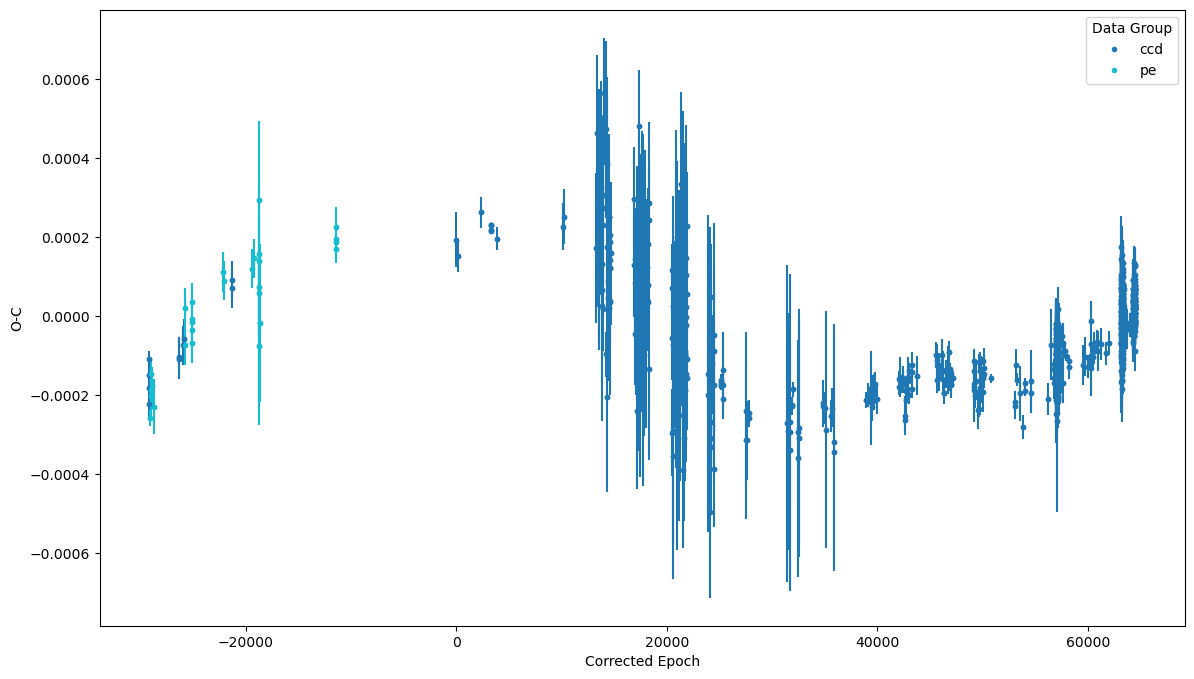

In [124]:
# plotting data
data.plot_OC()

In [125]:
# Model object created
# NOTE: This parameters got by fitting with worse parameters.
model = cf.OC_model()
lite = cf.LiTE()
lite.P_LiTE = cf.Parameter(value=77661, min=0, max=200000, std=20000)
lite.T_LiTE = cf.Parameter(value=46936, min=0, max=70000,std=40000)
lite.e = cf.Parameter(value=0.23, min=0, max=0.8, std=.1)
lite.omega = cf.Parameter(value=0, std=180)
lite.amp = cf.Parameter(value=0.00023, min=0, std=0.1)
lite2 = cf.LiTE()
lite2.name = "lite2"
lite2.P_LiTE = cf.Parameter(value=31452, min=0, max=200000, std=20000)
lite2.T_LiTE = cf.Parameter(value=47679, min=30000, max=70000,std=40000)
lite2.e = cf.Parameter(value=0.13, min=0, max=0.8, std=.1, vary=True)
lite2.omega = cf.Parameter(value=143, std=180)
lite2.amp = cf.Parameter(value=9.17e-05, min=0, std=1e4)

model.add_model_component(lite)
model.add_model_component(lite2)

In [126]:
# Creating fit object
fit = cf.fit(data=data, model=model)

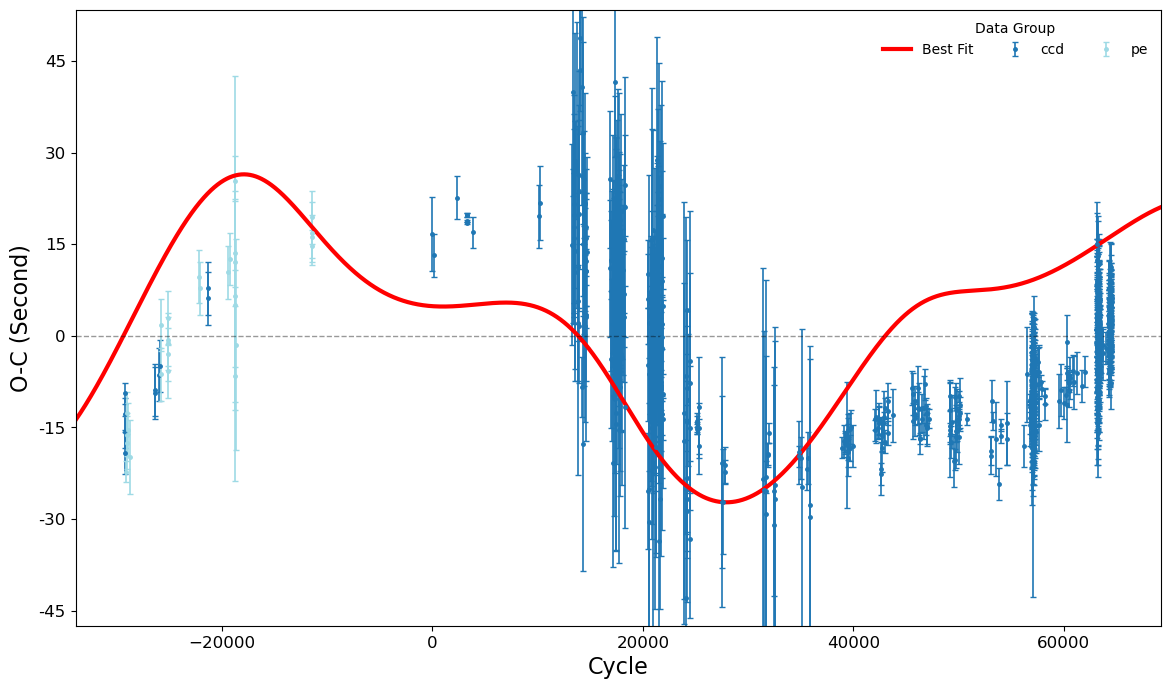

In [127]:
# Plotting given parameters with given data
fit.plot()

  0%|          | 0/5000 [00:00<?, ?it/s]c:\Users\user\anaconda3\Lib\site-packages\emcee\moves\red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 5000/5000 [04:59<00:00, 16.69it/s]


Removed 0 stuck walkers. Remaining walkers: 5000
samples burned in
new model created


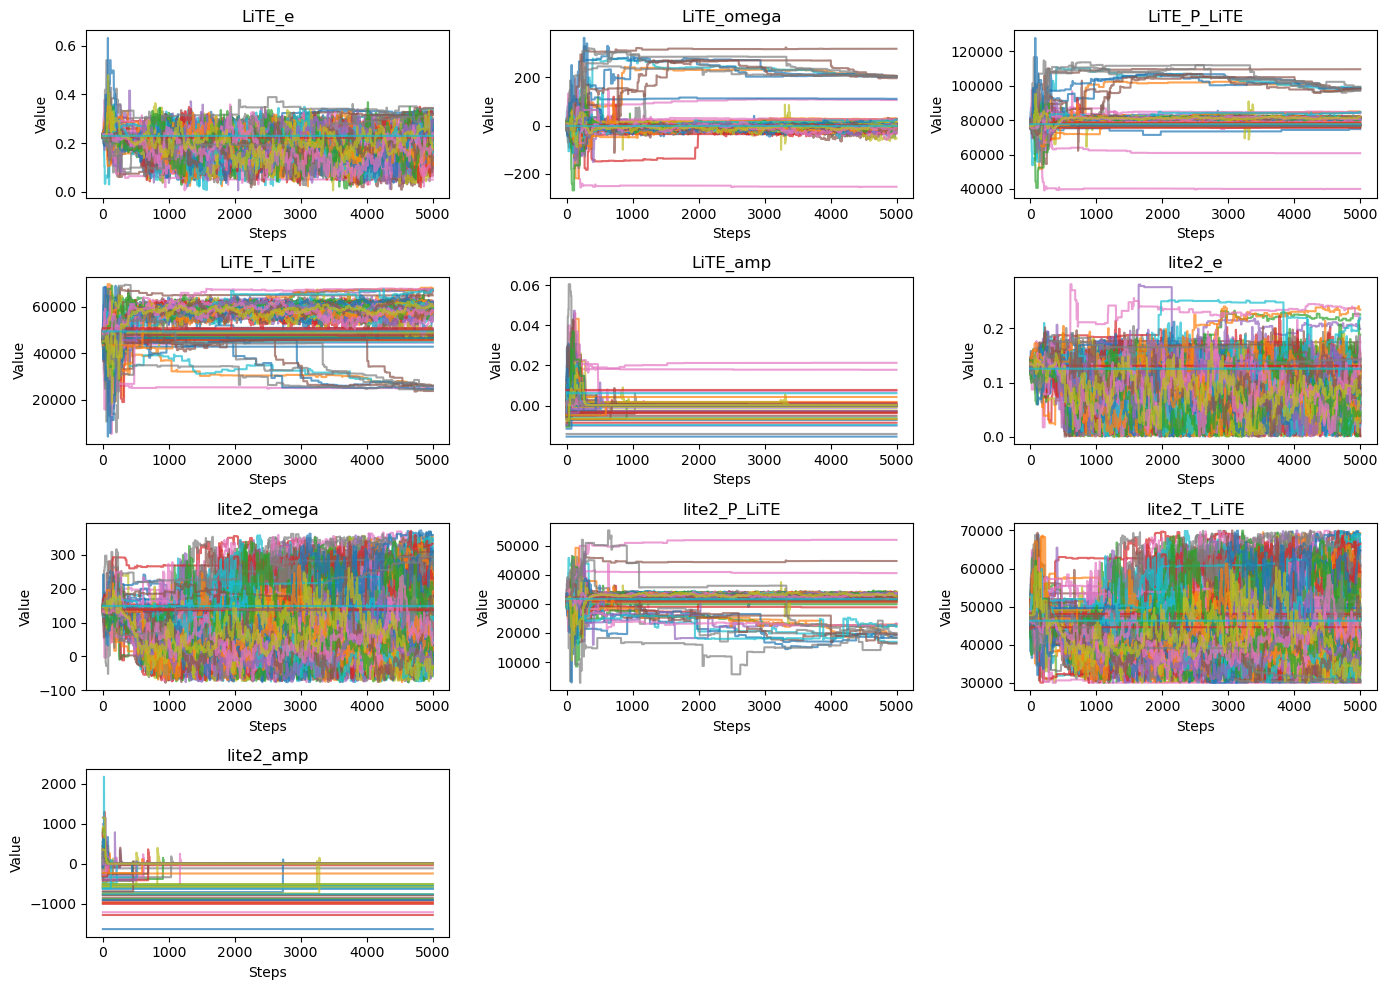

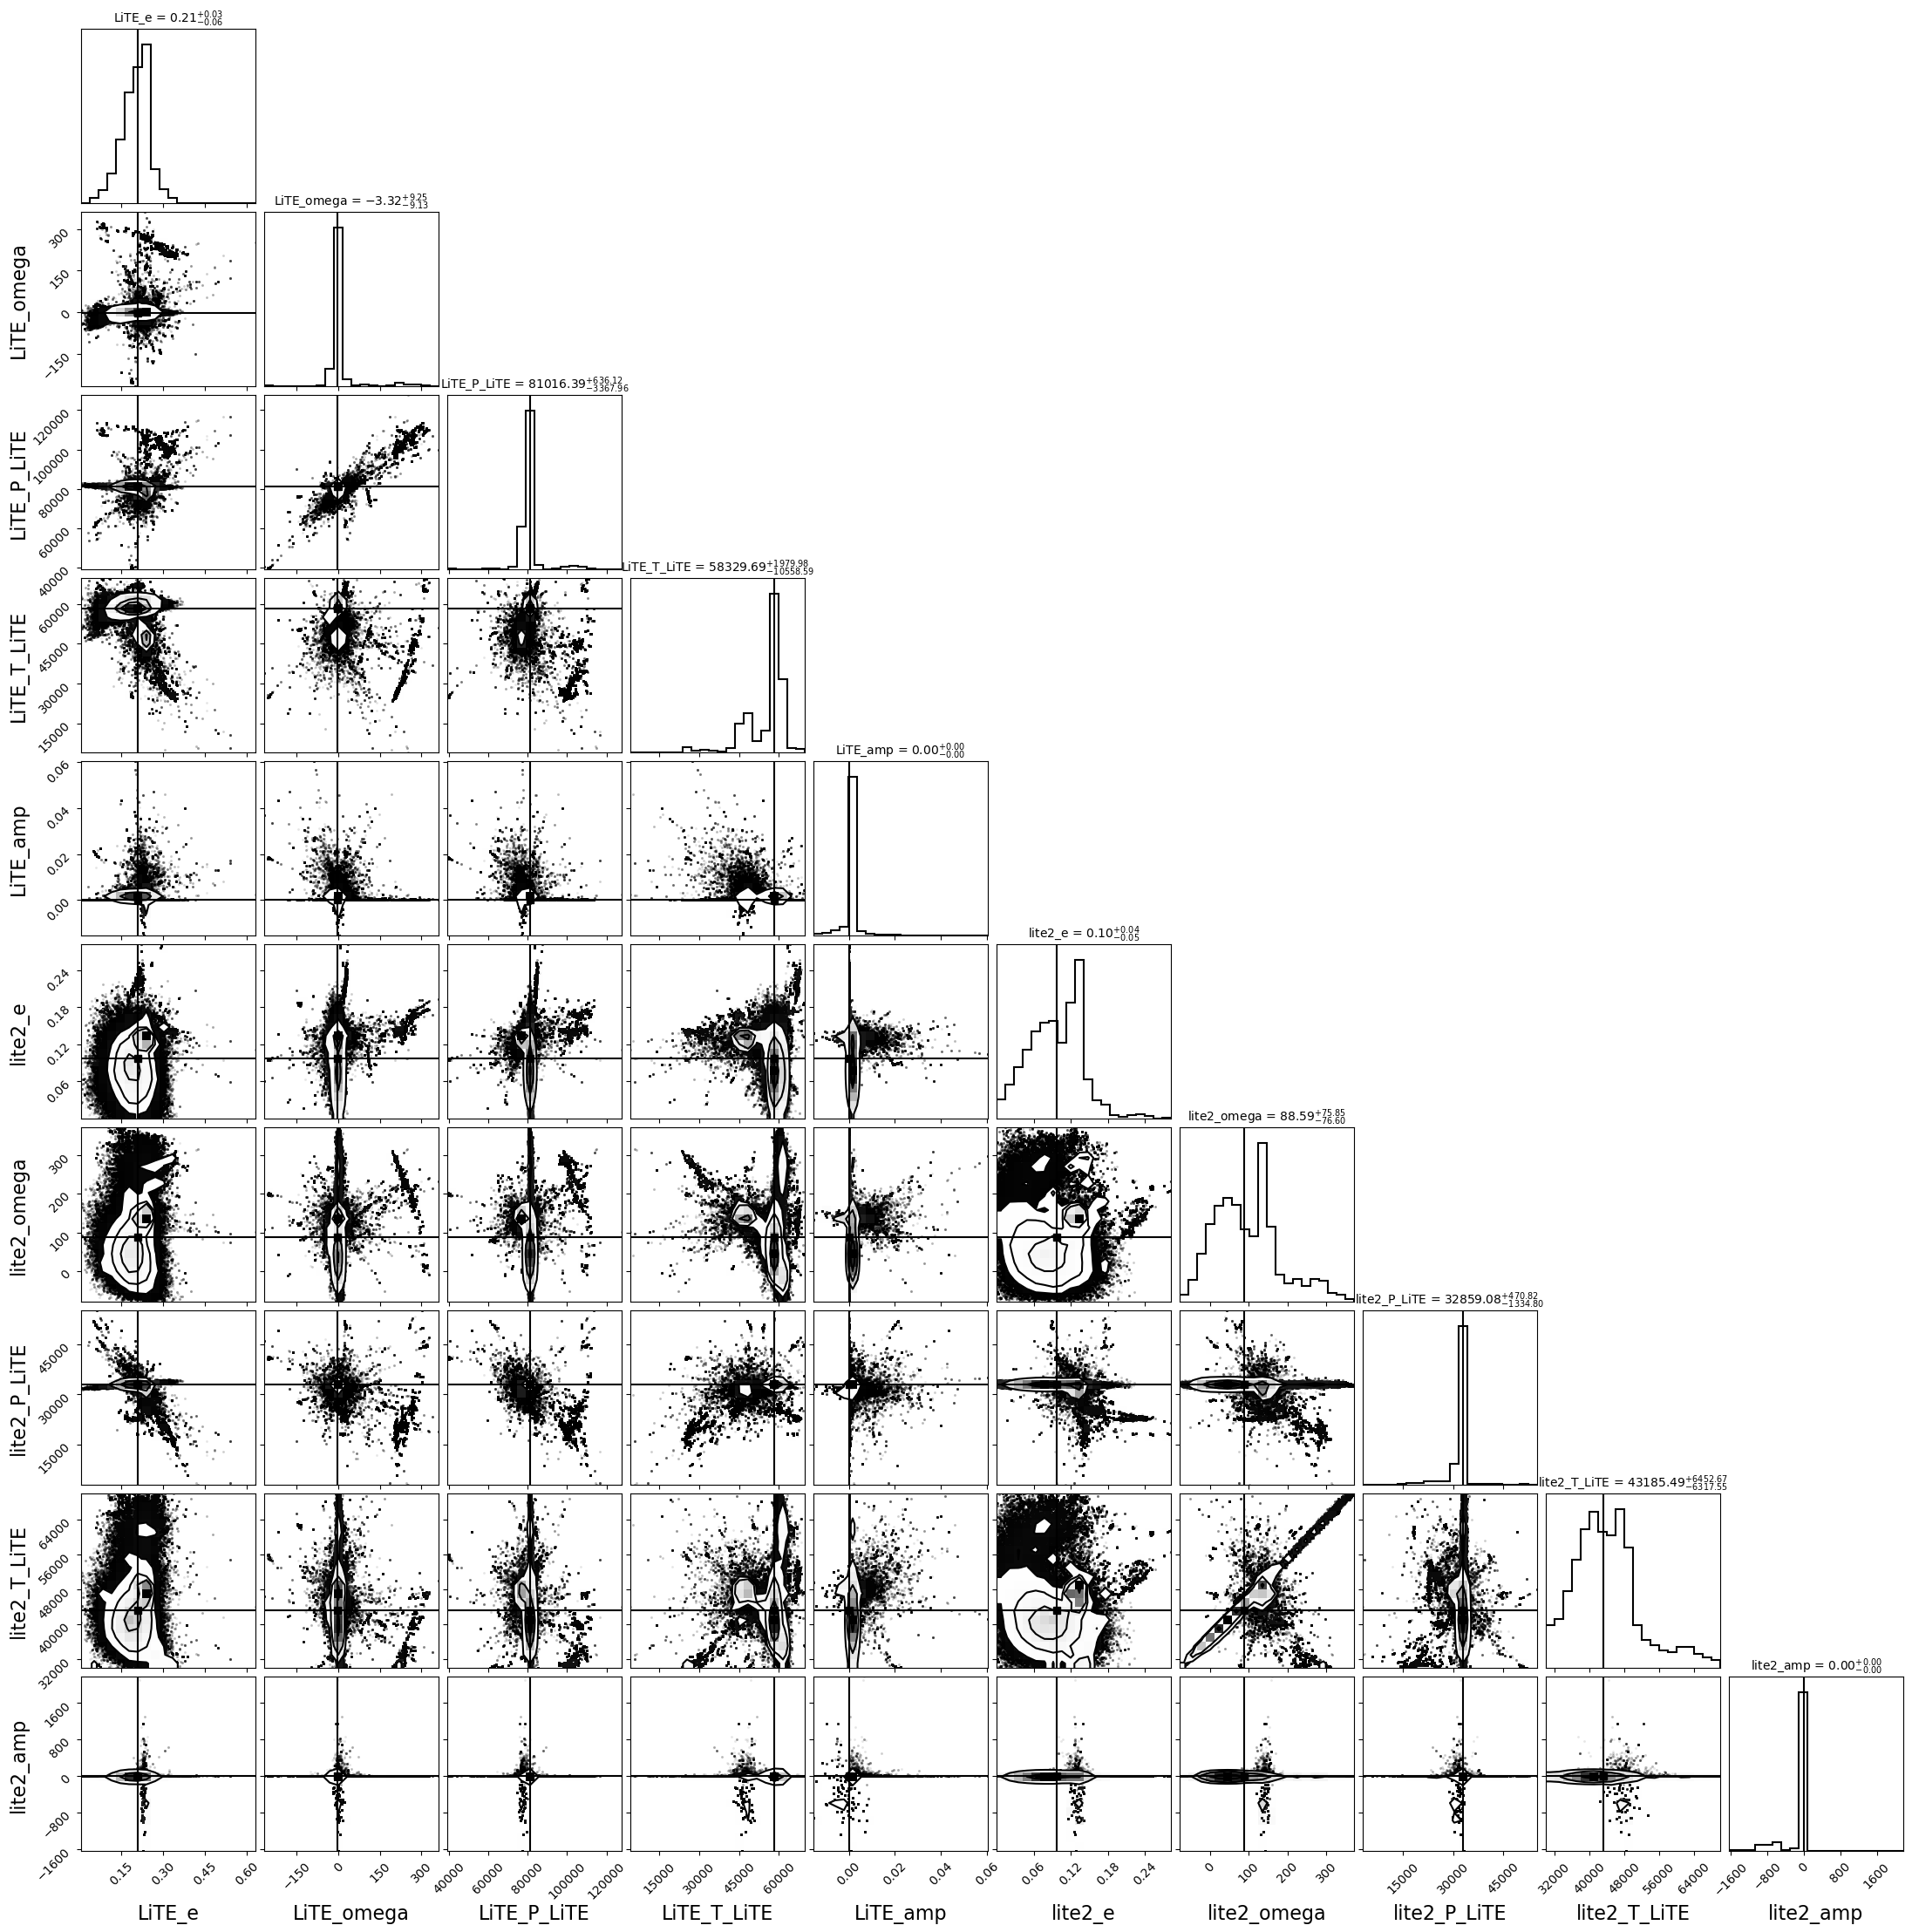

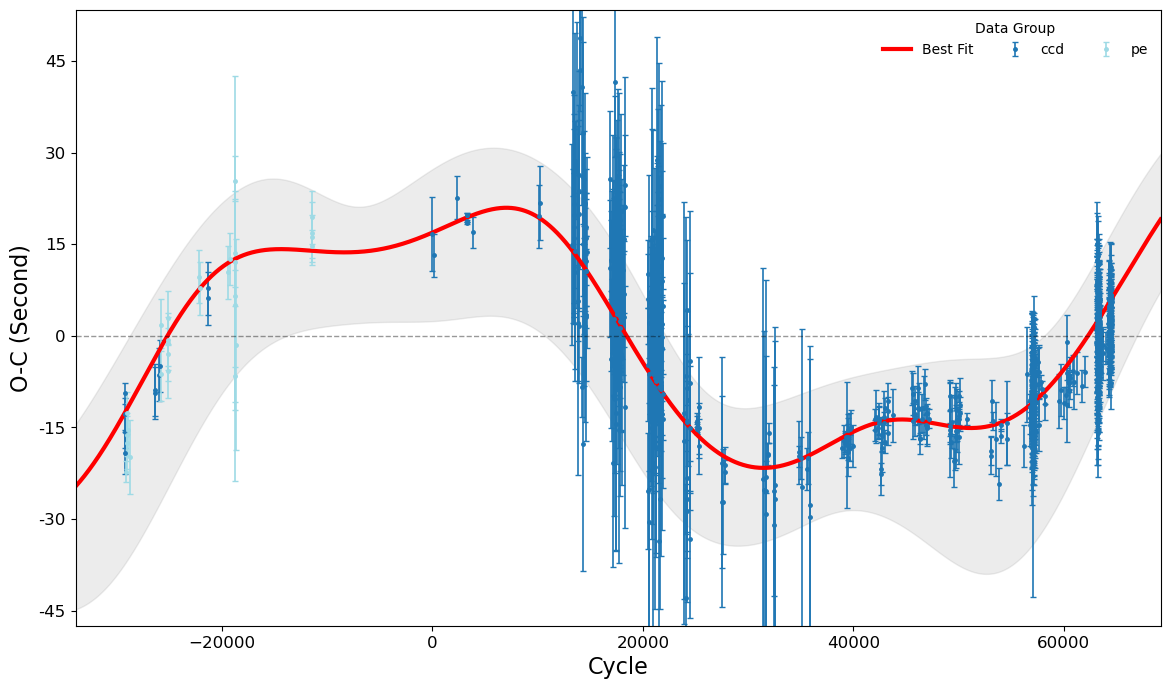

In [128]:
# Fitting probablistic
samples_reb = fit.fit_model_prob(walker=200, steps=5000, burn_in=3000, threads=20, prob_prior=True)

In [136]:
# Cleaning samples
samples_reb_2 = fit.clear_emcee_sample(samples_reb, clear_count=10, threshold=.1)

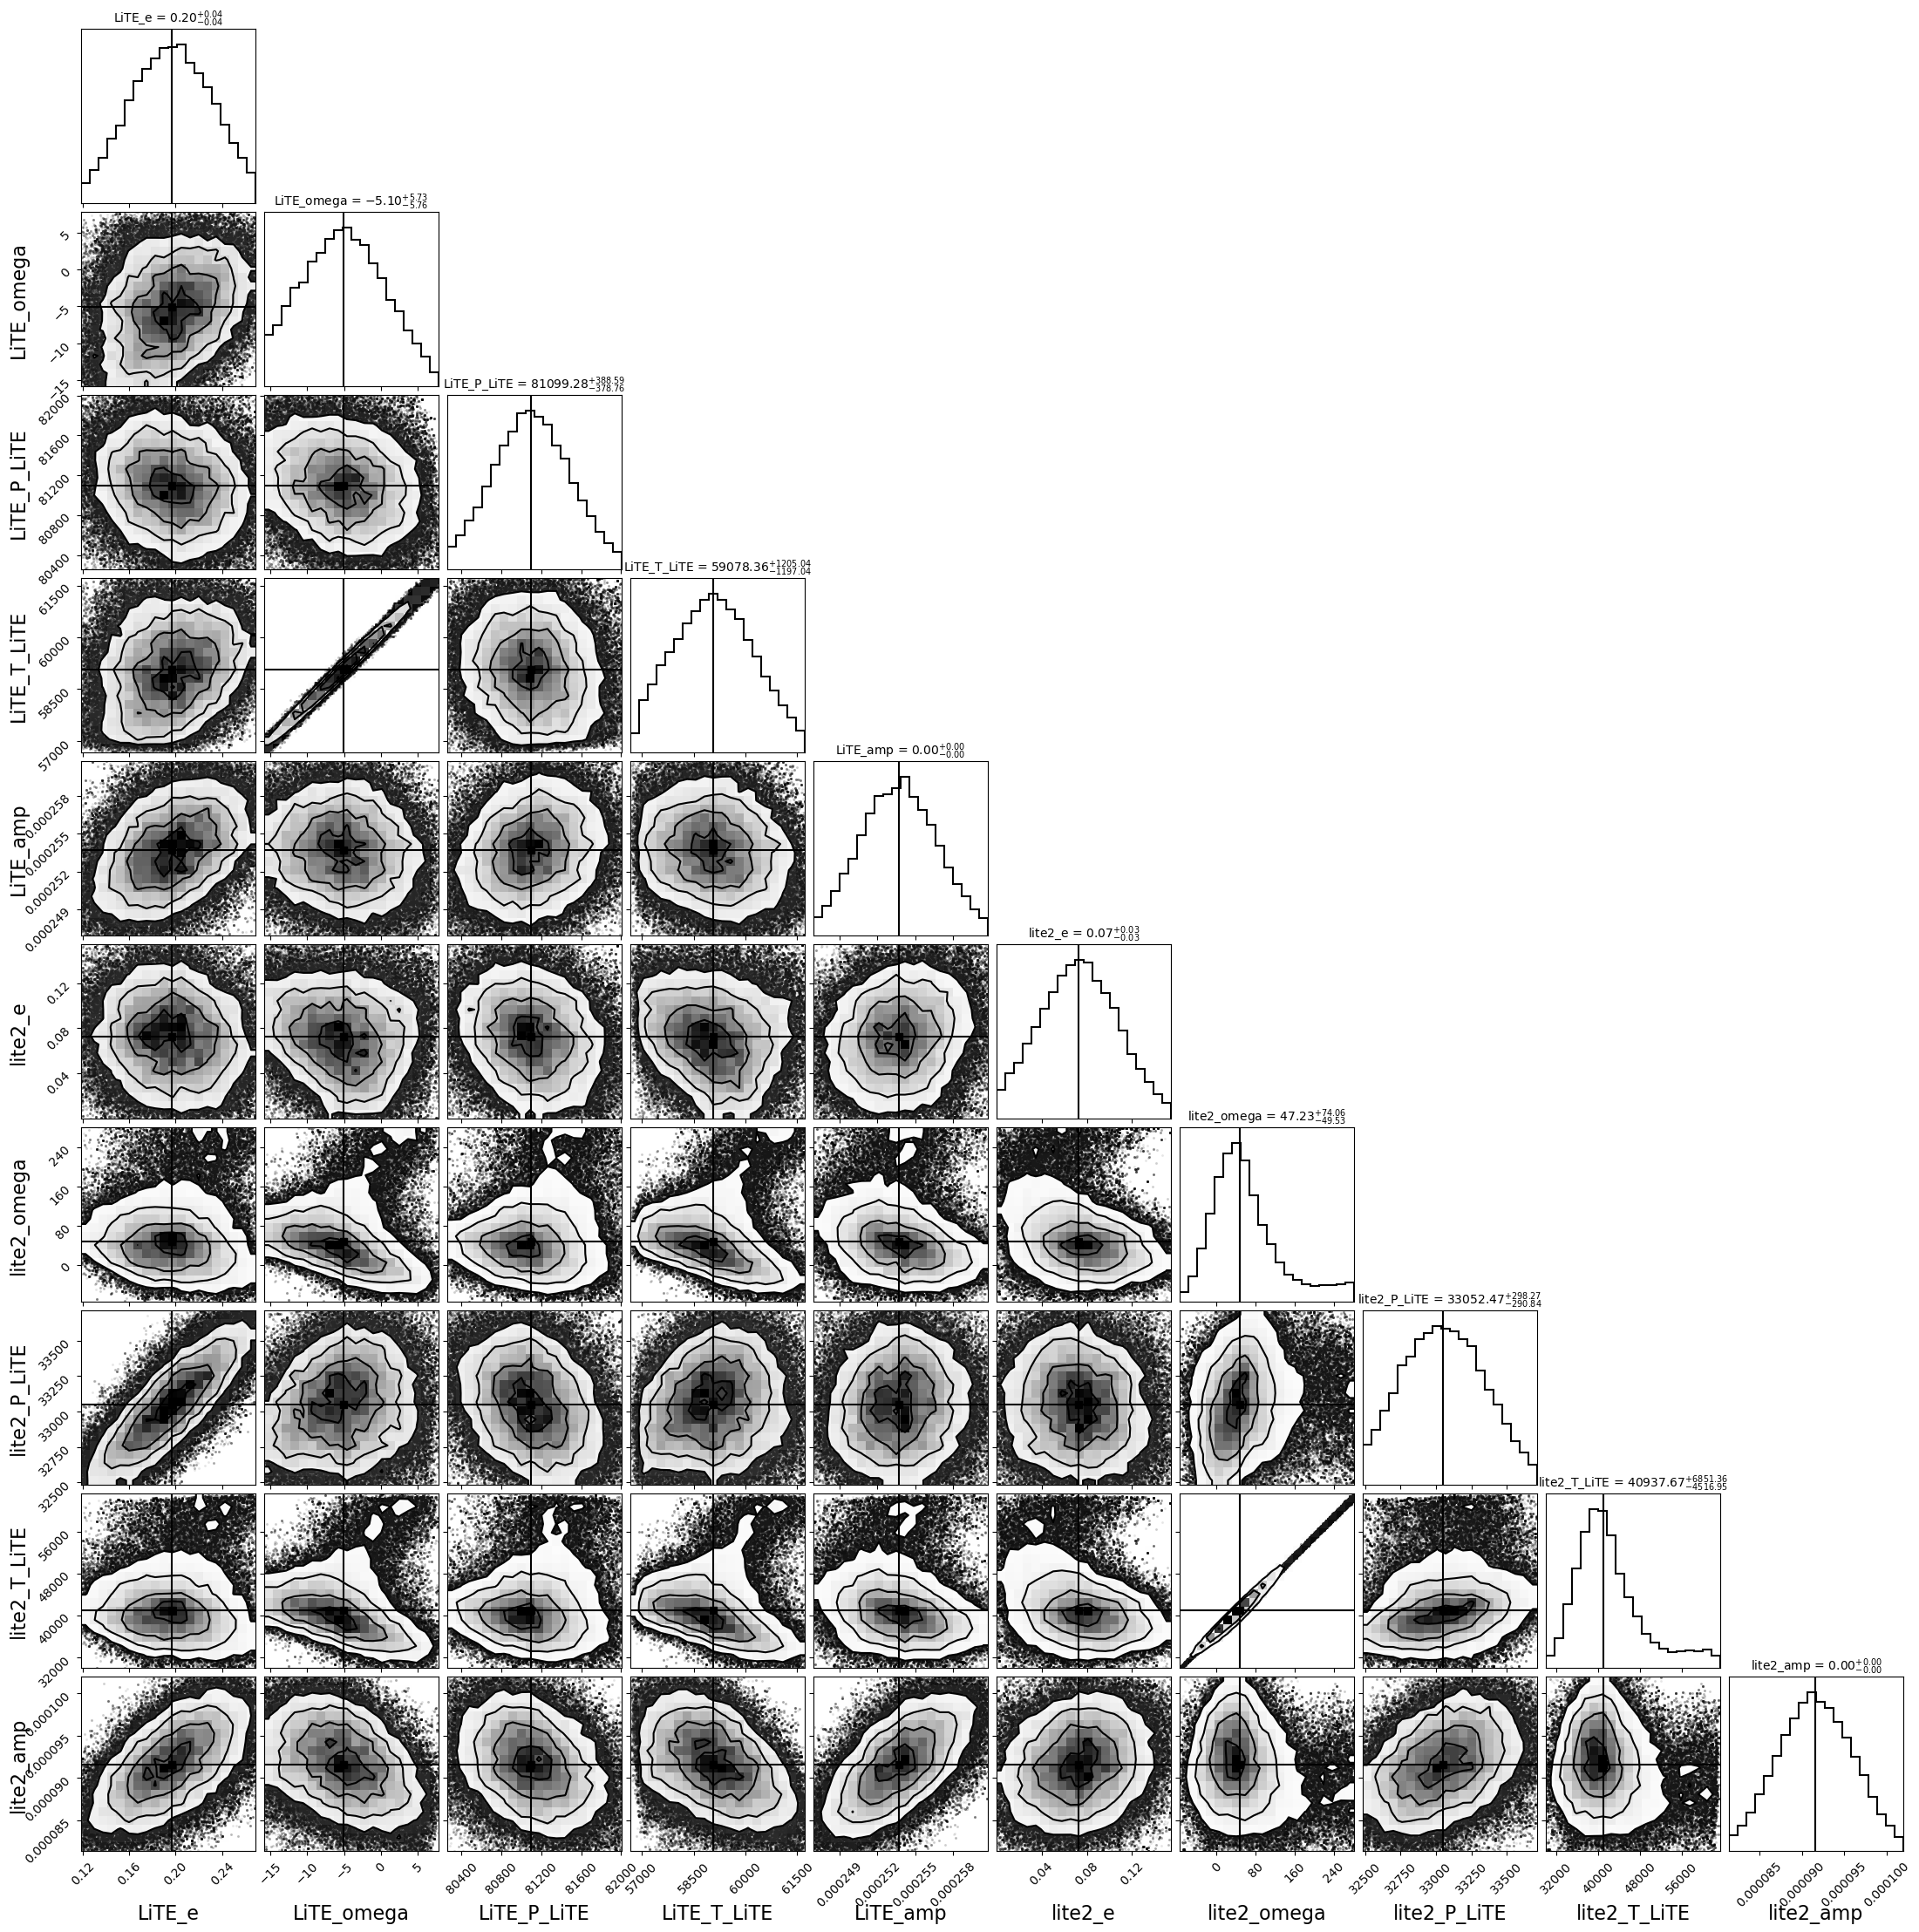

In [137]:
# Plotting new corner plot of cleaned samples
fit.corner_plot(samples_reb_2, show=True)

In [138]:
# Creating new model from cleaned samples
model2 = fit.create_model_from_samples(samples_reb_2)

In [139]:
fit.fitted_model = model2

In [140]:
fit.model_params()

{'e': 0.19637487768035428 Unitless, 'omega': -5.095140664401259 deg, 'P_LiTE': 81099.2750239641 epoch, 'T_LiTE': 59078.36132016242 epoch, 'amp': 0.0002537050199738976 day}
{'e': 0.07289922722069564 Unitless, 'omega': 47.22712601421409 deg, 'P_LiTE': 33052.46641380888 epoch, 'T_LiTE': 40937.66870375302 epoch, 'amp': 9.160659107963088e-05 day}


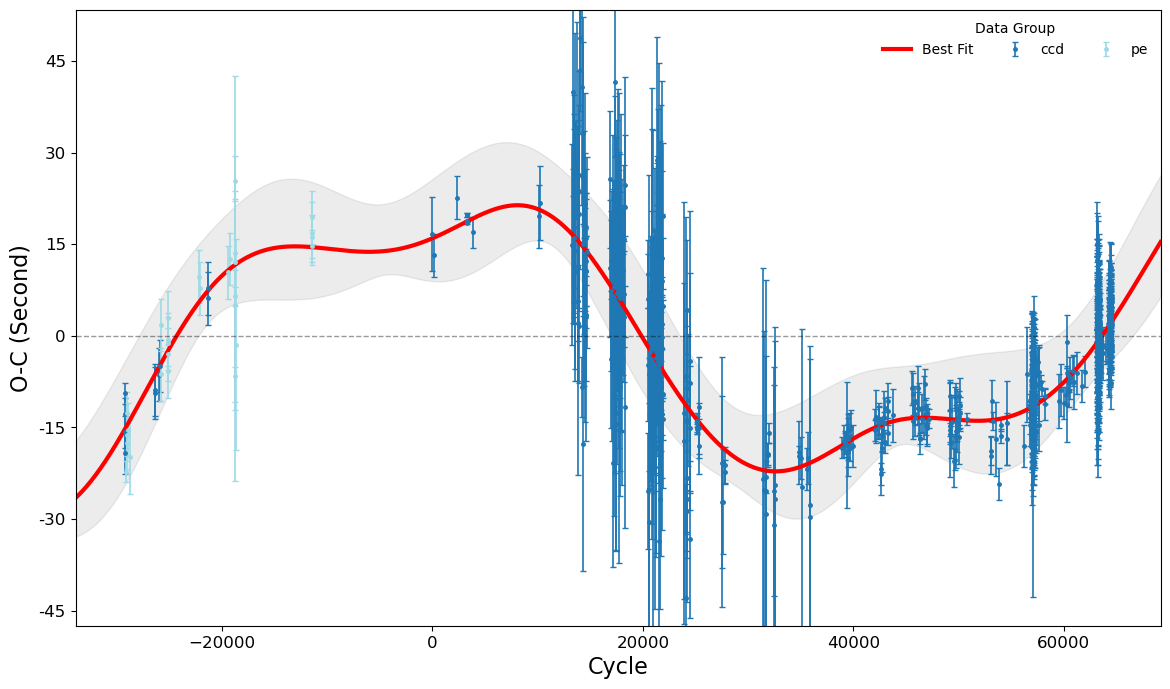

In [141]:
fit.plot(samples=samples_reb_2)

In [142]:
for mc in fit.fitted_model.model_components:
    print(mc.params)
    

{'e': 0.19637487768035428 Unitless, 'omega': -5.095140664401259 deg, 'P_LiTE': 81099.2750239641 epoch, 'T_LiTE': 59078.36132016242 epoch, 'amp': 0.0002537050199738976 day}
{'e': 0.07289922722069564 Unitless, 'omega': 47.22712601421409 deg, 'P_LiTE': 33052.46641380888 epoch, 'T_LiTE': 40937.66870375302 epoch, 'amp': 9.160659107963088e-05 day}
